In [48]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# coffee data
#url="https://github.com/jldbc/coffee-quality-database/raw/master/data/robusta_data_cleaned.csv"
test_features=pd.read_csv("data/Test.csv")
train_features=pd.read_csv("data/Train.csv")
variable_features=pd.read_csv("data/VariableDefinitions.csv")

# coffe score

#url="https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_ratings_raw.csv"
#coffee_quality=pd.read_csv(url)

In [49]:
test_features.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [50]:
train_features.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [51]:
variable_features

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [52]:
train_features.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [53]:
train_features.duplicated().sum()


0

In [54]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [55]:
train_features["age_group"].unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [56]:
train_features.columns.unique()

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [57]:
unique_values = train_features.apply(lambda col: col.unique())
print('unique:',unique_values)

unique: ID                       [tour_0, tour_10, tour_1000, tour_1002, tour_1...
country                  [SWIZERLAND, UNITED KINGDOM, CHINA, SOUTH AFRI...
age_group                                        [45-64, 25-44, 1-24, 65+]
travel_with              [Friends/Relatives, nan, Alone, Spouse, Childr...
total_female             [1.0, 0.0, 2.0, 4.0, 3.0, 5.0, 12.0, 10.0, 6.0...
total_male               [1.0, 0.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, 15.0,...
purpose                  [Leisure and Holidays, Visiting Friends and Re...
main_activity            [Wildlife tourism, Cultural tourism, Mountain ...
info_source              [Friends, relatives, others, Travel, agent, to...
tour_arrangement                               [Independent, Package Tour]
package_transport_int                                            [No, Yes]
package_accomodation                                             [No, Yes]
package_food                                                     [No, Yes]
package_transport

In [58]:
unique_values.to_csv('data/unique_Value_train_features.csv')

In [59]:
train_features.shape

(4809, 23)

In [60]:
train_features['total_female'].max()

49.0

In [61]:
train_features['total_female'].mean().round()

1.0

In [62]:
train_features['total_female'].fillna(round(train_features['total_female'].mean()), inplace=True)

In [63]:
train_features['total_female']
train_features['total_female'].isnull().sum()

0

In [64]:
train_features['total_male'].fillna(round(train_features['total_male'].mean()), inplace=True)
train_features['total_male'].isnull().sum()

0

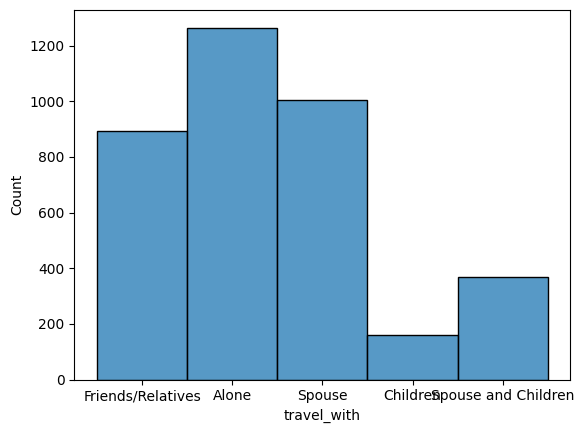

In [65]:
#travel_with
sns.histplot(train_features.travel_with)
plt.show()

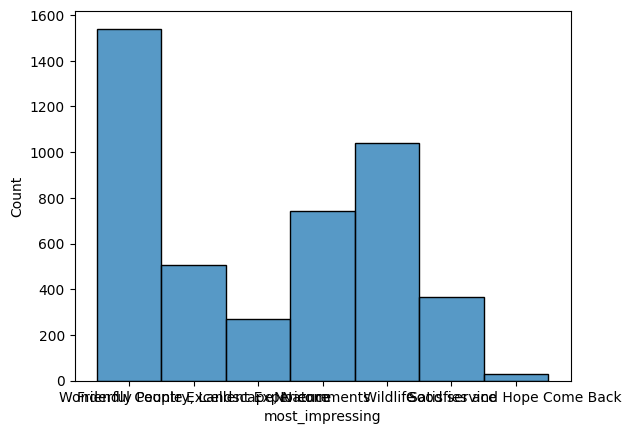

In [66]:
#most_impressing
sns.histplot(train_features.most_impressing)
plt.show()

In [ ]:
#most_impressing
sns.histplot(train_features.most_impressing)
plt.show()